<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
print(pandas)

<module 'pandas' from '/Users/facundo/anaconda3/lib/python3.6/site-packages/pandas/__init__.py'>


In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

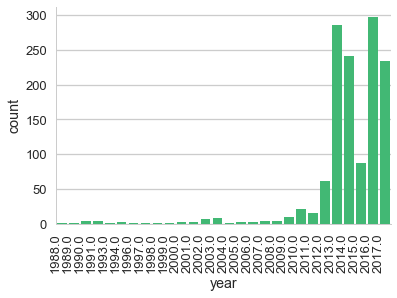

In [8]:
distribucion = dataset.year.value_counts()
ax = seaborn.barplot(data=distribucion.to_frame().reset_index(), 
    x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel="year", ylabel="count")
seaborn.despine()

In [32]:
fdps = dataset.year.value_counts(normalize=True, sort=True).sort_index()
fdps

1988.0    0.000760
1989.0    0.000760
1990.0    0.003799
1991.0    0.003799
1993.0    0.001520
1994.0    0.002280
1996.0    0.000760
1997.0    0.000760
1998.0    0.001520
1999.0    0.001520
2000.0    0.002280
2001.0    0.002280
2002.0    0.005319
2003.0    0.006839
2004.0    0.001520
2005.0    0.002280
2006.0    0.002280
2007.0    0.003799
2008.0    0.003799
2009.0    0.007599
2010.0    0.015957
2011.0    0.012158
2012.0    0.047112
2013.0    0.216565
2014.0    0.183131
2015.0    0.066109
2016.0    0.225684
2017.0    0.177812
Name: year, dtype: float64

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?
* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

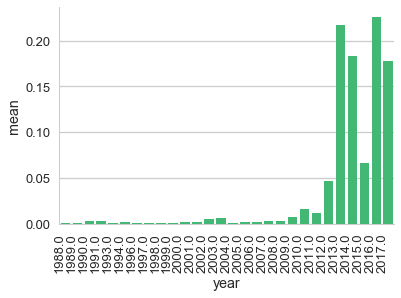

In [10]:
ax2 = seaborn.barplot(data=fdps.to_frame().reset_index() , 
    x='index', y='year', color='#2ecc71')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax2.set(xlabel='year', ylabel='mean')
seaborn.despine()

Aunque tienen la misma forma, el eje Y es diferente, ya que el primero muestra cantidades absolutas y el segundo
muestra la frecuancia de probabilidades. Si bien, los dos son útiles, nos parece que el primer gráfico es más útil
ya que al tener el número de ocurrencias en cada año, la probabilidad de ocurrencia se puede inferir.

Si consideramos todos los años, en los últimos, hubo un aumento significativo de los casos de violencia institucional. 
Si consideramos sólo los últimos dos años, la tendencia es que la violencia institucional está bajando.

In [33]:
fdps_acum = fdps.cumsum()
fdps_acum

1988.0    0.000760
1989.0    0.001520
1990.0    0.005319
1991.0    0.009119
1993.0    0.010638
1994.0    0.012918
1996.0    0.013678
1997.0    0.014438
1998.0    0.015957
1999.0    0.017477
2000.0    0.019757
2001.0    0.022036
2002.0    0.027356
2003.0    0.034195
2004.0    0.035714
2005.0    0.037994
2006.0    0.040274
2007.0    0.044073
2008.0    0.047872
2009.0    0.055471
2010.0    0.071429
2011.0    0.083587
2012.0    0.130699
2013.0    0.347264
2014.0    0.530395
2015.0    0.596505
2016.0    0.822188
2017.0    1.000000
Name: year, dtype: float64

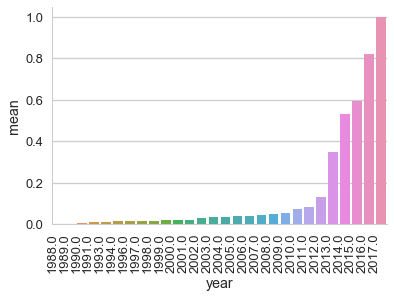

In [45]:
ax3 = seaborn.barplot(data=fdps_acum.to_frame().reset_index(), x='index', y='year')
ax3.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax3.set(xlabel='year', ylabel='mean')
seaborn.despine()

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia física’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?